# Predicting Popular Recipes and High Website Traffic on Tasty Bytes

Our data science team at Tasty Recipe has been tasked with developing a model that accurately predicts which recipes will be popular 80% of the time, and minimizing the occurrence of showcasing unpopular recipes on Tasty Bytes homepage.

More specifically, the challenge is divided into two objectives:
- Predict which recipes displayed on the website homepage will lead to high traffic
- Correctly predict high traffic recipes 80% of the time

The aim of the following project is to leverage the power of machine learning to accurately predict high traffic on our website. We will begin by conducting quality control and validation on the available historical data, followed by exploratory data analysis to gain deeper insights into the data. To handle any missing data, we will perform thorough data pre-processing and cleaning to ensure the reliability and suitability of the data for analysis.

Our next step will be to establish a baseline model using a simple algorithm and evaluate its performance compared to random guessing. Then, we will develop a more advanced model to improve the prediction accuracy. We will define clear business metrics to evaluate the performance of our models, and present our findings and conclusions with clear recommendations and next steps for Tasty Bytes data science team to follow. 

![TastyBytes](TastyBytes.jpeg)

**About Tasty Bytes**
_Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home.
Now, over two years on, we are a fully fledged business. For a monthly subscription we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet whatever your budget._
(image courtesy of logo.designcrowd.com)

## _Task List_

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   Has validated all variables and where necessary has performed cleaning tasks to result in analysis-ready data [DONE]

- Exploratory Analysis:  
	- Has created at least two different visualizations of single variables (e.g. histogram, bar chart, single boxplot) [DONE]
	- Has created at least one visualization including two or more variables (e.g. scatterplot, filled bar chart, multiple boxplots) [DONE]

- Model Fitting 
	- Correctly identified the type of problem (regression, classification or clustering) [DONE]
	- Has selected and fitted a model for that problem to be used as a baseline [DONE]
	- Has selected and fitted a comparison model for the problem that they were provided [DONE]
	- Code to fit the baseline and comparison models [DONE]
	
- Model Evaluation [DONE]
	- Compared the performance of the two models/approaches using any method appropriate to the type of problem [DONE]
	- Has described what the model comparison shows about the selected approaches [DONE]


- Business Focus [DONE]
	- Has described at least one of the business goals of the project [DONE]
	- Has explained how their work has addressed the business problem [DONE]
	- Has provided at least one recommendation for future action to be taken based on the outcome of the work done [DONE]


- Business Metrics [DONE]
	- Has defined a KPI to compare model performance to business criteria in the problem [DONE]
	- Has compared the performance of the two models/approaches using the defined KPI [DONE]	

- **Communication []**
	- **For each analysis step, has provided a written explanation of their findings and/or reasoning for selecting approaches [DONE]**
	- **Has delivered a verbal presentation addressing the business goals, outcomes and recommendations []**




# Summary
#### 1) Introduction
#### 2) Data Validation 
#### 3) Exploratory Analysis  
#### 4) Model Development
#### 5) Model Evaluation
#### 6) Business Metrics
#### 7) Conclusions and Recommenations

---
# 1. Introduction 
## Business Question: Can we predict with 80% accuracy which recipes will generate high traffic?

Our dataset includes a categorical "high_traffic" column and columns with food recipe specifics such as calories, carbohydrate and sugar content in grams, recipe category, and serving size.

We will aim to build a binary classification model that predicts whether a recipe will generate high web traffic or not.

- Target variable (dependent variable): 'high_traffic'
- Features (predictors): food recipe characteristics

We will evaluate the dataset's quality, use cleaning and preparation techniques to ensure data quality and analysis readiness. We will perform exploratory analysis to identify trends and insights to better understand our data.

To evaluate the model's effectiveness, we will create a baseline prediction algorithm and compare our model's performance to random guessing. We will improve the model's performance using more sophisticated algorithms and feature selection techniques, then apply appropriate business metrics to interpret the final models and draw our conclusions. 

---
# 2. Data Validation

In this section, we will validate the quality and accuracy of the data to ensure its readiness for analysis. We will perform a comprehensive examination of each column in the data, checking for any missing or incorrect values (outliers, etc). This will be followed by data cleaning steps to correct and impute missing data.

Our goal in this section is to provide a solid data foundation by ensuring their reliability and accuracy, which will enable us to make meaningful predictions and achieve our project objectives.


In [1]:
# Imports core Python libraries
import pandas as pd
import numpy as np
from pathlib import Path

# visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# statistical library for p-values calculation
from scipy import stats

# Machine Learning libraries for fast-track test 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#set random set for reproductability 
seed = 42 

## 2.1 Load the data, and perform first obsvervations

In [2]:
# Load the dataset into a Pandas Dataframe
recipe_df = pd.read_csv(Path("recipe_site_traffic_2212.csv"))

# Review the DataFrame
recipe_df.head()

recipe  calories  carbohydrate  sugar  protein   category servings  \
0       1       NaN           NaN    NaN      NaN       Pork        6   
1       2     35.48         38.56   0.66     0.92     Potato        4   
2       3    914.28         42.68   3.09     2.88  Breakfast        1   
3       4     97.03         30.56  38.63     0.02  Beverages        4   
4       5     27.05          1.85   0.80     0.53  Beverages        4   

  high_traffic  
0         High  
1         High  
2          NaN  
3         High  
4          NaN

In [3]:
# define recipe as index for the dataframa and rename and sort index
recipe_df = recipe_df.set_index("recipe")
recipe_df.index.name = "recipe_id"
recipe_df = recipe_df.sort_index()

In [4]:
# examine the statistical distribution of the values within the dataframe columns
recipe_df.describe()

calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000

In [5]:
# check the datatypes of the column and count of missing values for each column
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


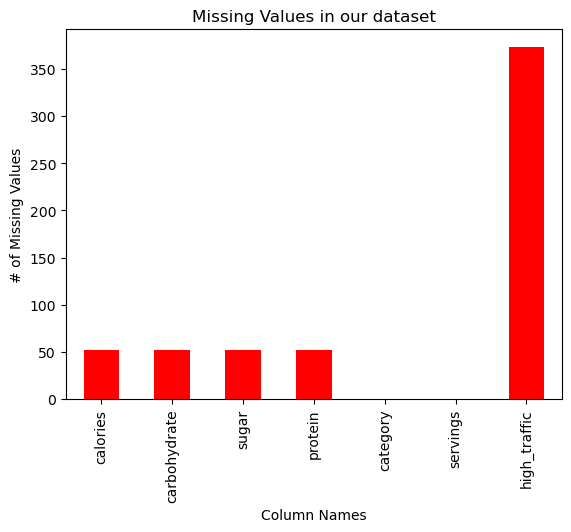

In [6]:
# check for missing values with a bar chart
recipe_df.isnull().sum().plot(kind='bar', color = 'red')

# Add a title and axis labels
plt.title('Missing Values in our dataset')
plt.xlabel('Column Names')
plt.ylabel('# of Missing Values')

plt.show()

The dataset consists of 7 columns and 947 rows, including numerical (float64) and categorical (object) data types. 
- The 4 numerical columns have 52 missing values (approx. 5%) 
- 2 of the categorical columns do not have any missing values at all : 'category' and 'servings'. 
- The 'high_traffic' categorical column has 373 missing values (approx. 39%).

#### Histograms of the numerical data columns

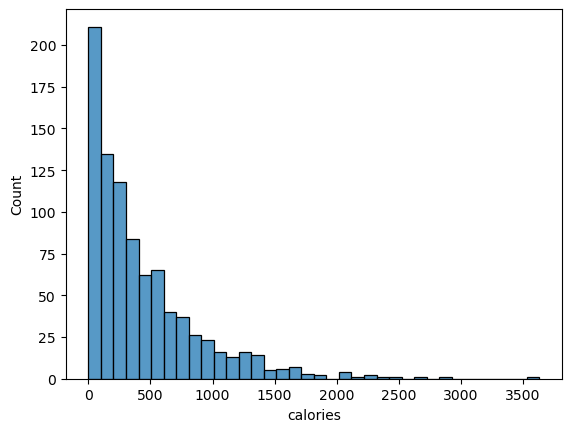

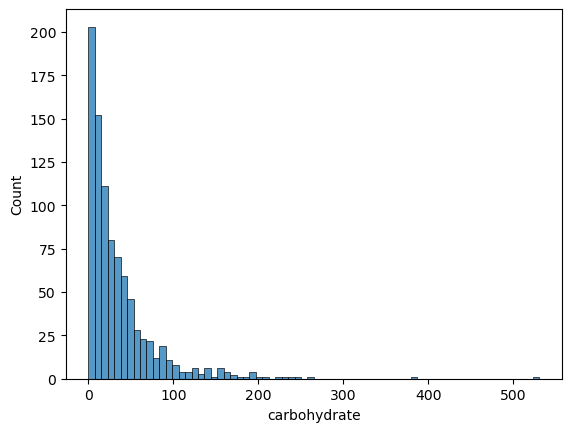

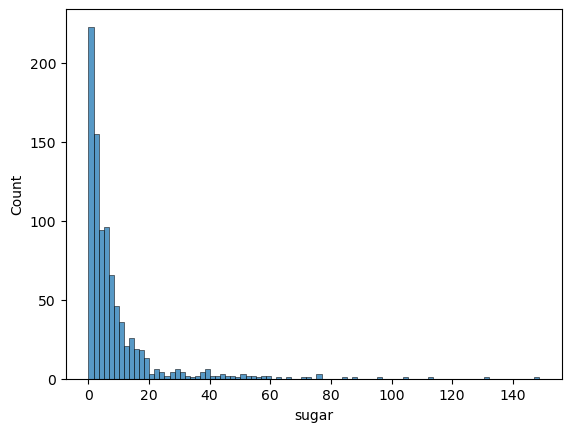

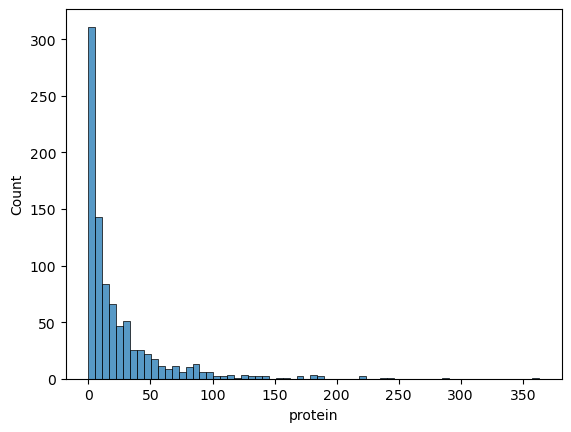

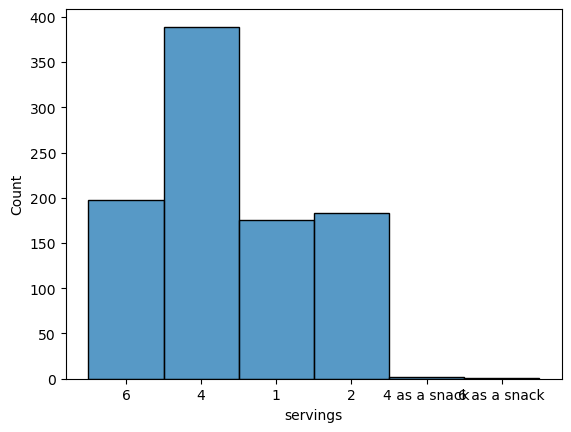

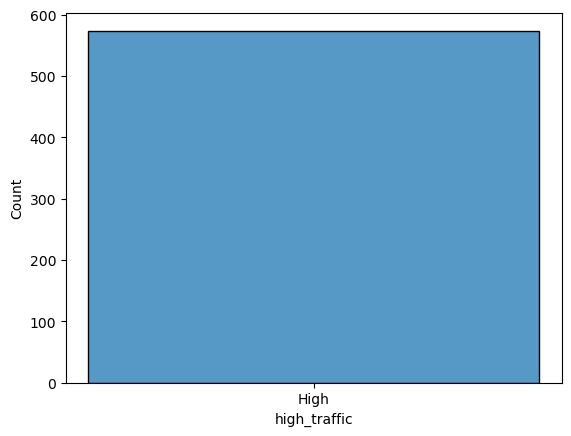

In [7]:
# Identify the numerical columns
num_columns =('calories','carbohydrate','sugar','protein','servings','high_traffic')

# Plot an histogram for each one of the numerical columns
for column in num_columns:
    plt.figure()
    sns.histplot(data=recipe_df, x=column)
    plt.show()

#### Pie chart of the categorical columns

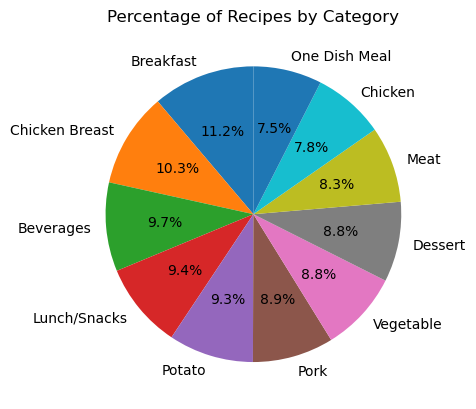

In [8]:
# Count the occurrences of each category
category_counts = recipe_df['category'].value_counts()

# Plot the pie chart
plt.pie(category_counts, labels=category_counts.index, startangle=90, autopct='%1.1f%%')

# Set the title
plt.title("Percentage of Recipes by Category")

# Show the plot
plt.show()

### First Observations
- The columns in the dataset include: calories, macro-nutrient content (protein, sugar and carbs), number of servings, and category.
- The dataset contains missing values, with 5.5% of the macro-nutrient data (protein and carbs in grams) missing and 39.3% of the Traffic data missing.
- Despite the limited information on macro-nutrients (carb, sugar, and protein only), we have the information on total calories, which may allow us to estimate fat content.
- There are no negative values in the macro-nutrient columns, and it is reasonable to expect that these values can start from zero, as it is common to see recipes with low carb content or low sugar.
- The data provides more than 900 observations, making it suitable for a machine learning workflow.

### Assumptions and path forward workflow: 
- To interpret the traffic data, we will use the 'high_traffic' column, assuming that a value of 'High' indicates confirmed high web traffic when a particular recipe was published on the Tasty Bytes website homepage. Any non-data values in the 'high_traffic' column will be categorized as 'Other'. Although we lack information on whether 'Other' corresponds to high or low traffic, it is reasonable to assume that the 'High' labeled recipes are the most popular, given the context."

- To handle the skewed distribution and outliers in the data, we can use various preprocessing techniques such as scaling, transforming, or removing outliers before building a predictive model.
- The 'category' column is comprised of 11 unique labels, well-balanced, with each label representing between 7.5% and 11.2% of the available observations in the historical dataset. We will merge the instances with "Chicken Breast" with "Chicken" to simplify the categories. 

**--> Based on the above asumptions, our historical dataset contains 574 cases of 'High' traffic and over 400 cases of 'Other' traffic, making it suitable for performning binary classification using machine learning.**



--- 
## 2.2 Data Preprocessing and QC
Before building our binary classification model to predict instances of high traffic for Tasty Bytes recipes, we need to ensure the data is reliable and suitable for analysis. We will preprocess and perform quality control on each column using the following steps:

- Identify and address missing or invalid values in the column.
- Impute missing values for columns with a high proportion of missing data using an appropriate imputation technique.
- Transform the data to meet the assumptions necessary for statistical analysis, such as normality, linearity, and equal variance.
- Identify and handle outliers using appropriate methods, such as removal or transformation, to avoid bias in the data.

### Handling the non-data values in the 'high_traffic' column.
Before building our binary classification model to predict instances of high traffic for Tasty Bytes recipes, we need to handle the non-data values in the 'high_traffic' column.

We will assign a value of 1 to all cases labeled as 'High', indicating that these recipes generated high traffic.
For missing values labeled as 'Other', we will encode them as 0. These cases correspond to recipes for which the actual traffic is unknown and could be either high or low.
Our goal is to build a highly accurate binary classification model that predicts high traffic for Tasty Bytes recipes using the following values:

- 0: Unknown traffic (could be high or low)
- 1: High traffic.

In [9]:
qc_recipe_df = recipe_df

# Replace all null values in column 'High_Traffic' with 0
qc_recipe_df['high_traffic'].fillna(0, inplace=True)

# Replace all 'High' values in column 'High_Traffic' with 1
qc_recipe_df['high_traffic'] = qc_recipe_df['high_traffic'].replace('High', 1)

### Columns Renaming 

In [10]:
# Displaying the unique values of the column "category". 
qc_recipe_df['category'].unique()


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [11]:
# naming best pratice: replace "Lunch/Snacks" value in "category" column by "Lunch_Snacks" and replace spaces and slashes by "_" 
qc_recipe_df['category'] = qc_recipe_df['category'].replace('Lunch/Snacks', 'Lunch_Snacks')
qc_recipe_df['category'] = qc_recipe_df['category'].replace('One Dish Meal', 'One_Dish_Meal')

# merging together categories that describe the same category of food
qc_recipe_df['category'] = qc_recipe_df['category'].replace('Chicken Breast', 'Chicken')
#qc_recipe_df['category'] = qc_recipe_df['category'].replace('Potato', 'Vegetable')

In [12]:
# check value of servings 
qc_recipe_df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

The 'servings' column appear as being a categorical one. Nonetheless most of its values are numerical, and some of them that are text could be easily converted to a number. For instance converting '4 as a snack' as 4 (number four). 

But what does '4 as a snack' really means?

#### Understanding what "as a snack" means in the servings size

In [13]:
# let's understand what are the '6' servings and '6 as a snack' to understand better what '6 as a snack' means
serving6mean_df =  qc_recipe_df.loc[qc_recipe_df['servings']=='6'][['calories','carbohydrate','sugar','protein']].mean()
serving4mean_df =  qc_recipe_df.loc[qc_recipe_df['servings']=='4'][['calories','carbohydrate','sugar','protein']].mean()
serving6snack_df=  qc_recipe_df.loc[qc_recipe_df['servings']=='6 as a snack']
serving4snack_df=  qc_recipe_df.loc[qc_recipe_df['servings']=='4 as a snack']

In [14]:
pd.options.display.float_format = '{:,.2f}'.format
display(serving6snack_df)
display(serving6mean_df)
display(serving4snack_df)
display(serving4mean_df)

calories  carbohydrate  sugar  protein      category      servings  \
recipe_id                                                                       
549        1,440.69         30.59   5.78    30.63  Lunch_Snacks  6 as a snack   

           high_traffic  
recipe_id                
549                   1

calories       419.13
carbohydrate    32.38
sugar            8.64
protein         24.60
dtype: float64

calories  carbohydrate  sugar  protein      category      servings  \
recipe_id                                                                       
452        1,542.53         14.73   5.71    29.92  Lunch_Snacks  4 as a snack   
736          513.75         65.87  18.63    18.39  Lunch_Snacks  4 as a snack   

           high_traffic  
recipe_id                
452                   1  
736                   0

calories       423.05
carbohydrate    36.08
sugar            9.15
protein         22.54
dtype: float64

We found only a few entries with the 'as a snack' suffix in the 'servings' column. Based on our analysis of the corresponding calorie count, it seems reasonable to assume that these entries represent a single serving with an estimated calorie count between 125 and 400. The macro-nutrient content (carb, sugar, protein) is also consistent with the averages observed in other entries with 4 or 6 servings. 

**--> Therefore, we will remove the 'as a snack' suffix and convert the 'servings' column to numerical.**

In [15]:
# lets remove ' as a snack' string from the column values for 'servings'
qc_recipe_df["servings"] = qc_recipe_df["servings"].str.replace(" as a snack", "")

# make sure that the values in the 'servings' column are numeric
qc_recipe_df["servings"] = pd.to_numeric(qc_recipe_df["servings"], errors='coerce')

qc_recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 59.2+ KB


### Are the numerical features statistically significant? 
We will perform a statistical test to determine the significance of the numerical features.

In [19]:
pvalue_df = qc_recipe_df.dropna()

# Store the names of the columns in a list
column_names = ['calories','carbohydrate','sugar','protein','servings']

# Define features set and target vector 
X_pv = pvalue_df[column_names]
#X = pvalue_df.drop(columns=['high_traffic','category']).astype(float)
y_pv = pvalue_df['high_traffic'].astype(float)

# Loop through each column
for column in column_names:
    # Get the p-value for the column
    p_value = stats.pearsonr(pvalue_df[column], pvalue_df['high_traffic'])[1]
    
    # Print the column name and its corresponding p-value
    print(f"{column}: {p_value}")

calories: 0.026065982071963825
carbohydrate: 0.015444390210209737
sugar: 0.023847573817120195
protein: 0.1827526942342248
servings: 0.1963318117952701


### Rejecting the null hypothesis for 'calories', 'carbohydate' and 'sugar'

For calories, carb and sugar, the p-value are less than 0.05, which means that the likelihood of the result being due to chance is low, and that the null hypothesis that there is no relationship between the feature and the target vector can therefore be rejected. 

In other words, the results of the statistical tests for the features calories, carb, and sugar indicate a strong relationship between these variables and the target vector 'high_traffic'. 

**'calories', 'carbohydate' and 'sugar' are statistically significant, and we can expect them play a role in predicting the value of 'high_traffic'.** 

### Quick Fast Track Predictive Model - Logistic Regression
To build a fast-track model, we have selected only the statistically significant predictors indentified so far : 'calories', 'carbohydrates', and 'sugar'. We will use these features to train a simple classification model using logistic regression, and assess its accuracy. The aim is to determine whether the model can outperform random guessing; even a slight improvement above random guessing (50%) will be a good indication of the predictive power of those chosen predictors. 

In [22]:
fast_track = qc_recipe_df.dropna()

# Load your data into X and y
X_ft = fast_track[["calories","carbohydrate","sugar"]] 
y_ft = fast_track[["high_traffic"]]

# Split the data into training and testing sets
X_ft_train, X_ft_test, y_ft_train, y_ft_test = train_test_split(X_ft, y_ft, random_state=42)

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_ft_train, y_ft_train)

# Make predictions on the testing set
y_ft_pred = lr.predict(X_ft_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_ft_test, y_ft_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59375


/Users/adriencaudron/miniforge3/envs/algo310/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The fast-track model demonstrates an accuracy of nearly 60%, which is a promising sign for the predictive power of our chosen predictors in accurately forecasting the target variable, high_traffic.

---
# 3. Exploratory Data Analysis
In this section, we will include different graphics and visualization displaying the relationship between our variables. Through this exploratory analysis, we aim to uncover important insights and patterns in the data.

In [23]:
def display_boxplots(df, id_vars, value_vars, value_name, var_name, aspect_ratio):
    # Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
    melted_df = df.melt(id_vars=id_vars, value_vars=value_vars, value_name=value_name, var_name=var_name)

    # Use catplot to create boxplots
    sns.catplot(data=melted_df, x=value_name, y=var_name, hue=id_vars[0], kind='box', height=10, aspect=aspect_ratio)

    # Show the plot
    plt.show()

In [24]:
#create new columns for the food specs (calories, carbohydrate, sugar, protein) per serving
qc_recipe_df['calories_per_serving'] = qc_recipe_df['calories'] / qc_recipe_df['servings']
qc_recipe_df['carbohydrate_per_serving'] = qc_recipe_df['carbohydrate'] / qc_recipe_df['servings']
qc_recipe_df['sugar_per_serving'] = qc_recipe_df['sugar'] / qc_recipe_df['servings']
qc_recipe_df['protein_per_serving'] = qc_recipe_df['protein'] / qc_recipe_df['servings']

#### Check if we can use the category to impute the missing value using the mean of each category

/Users/adriencaudron/miniforge3/envs/algo310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adriencaudron/miniforge3/envs/algo310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adriencaudron/miniforge3/envs/algo310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adriencaudron/miniforge3/envs/algo310/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

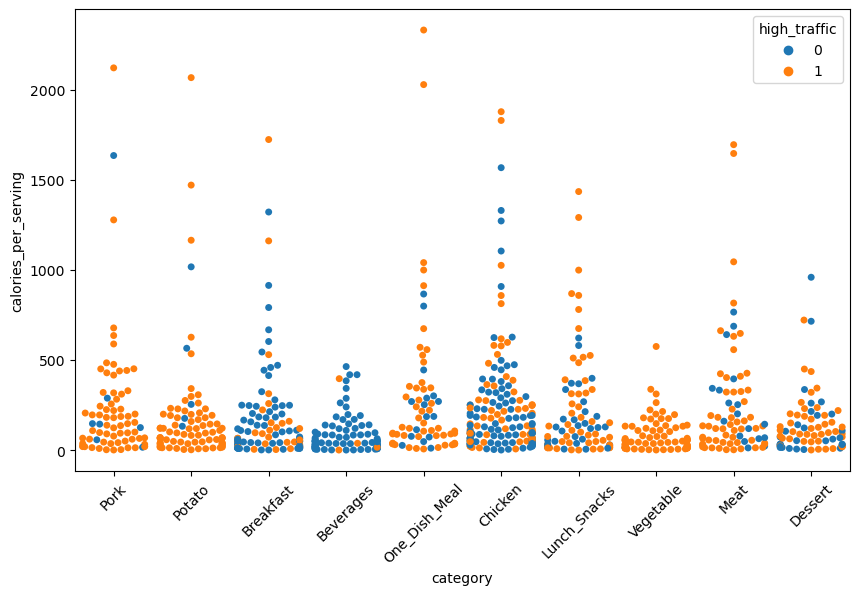

In [25]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create violin plots for column 'sugar' across different categories
#sns.violinplot(data=qc_recipe_df, x="category", y="calories_per_serving", inner="stick")

# create swarm plot
sns.swarmplot(data=qc_recipe_df, x="category", y="calories_per_serving", hue = "high_traffic")

# Rotate the x tick labels
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Show the plot
plt.show()

The swarm plot above shows us 2 things:

there could be outliers in some categories: over 2000 calories per serving seems indeed quite high for just one serving (a pizza slice for reference is aprox 500 calories)
some categories seems to generate high-traffic, like vegetable, potato, pork (orange color dominant in the graph), while other are generating low traffic: beverages, breakfast (blue color dominant).

In [ ]:
qc_recipe_df['protein_per_serving'].describe()

In [ ]:
qc_recipe_df['calories_per_serving'].describe()

In [ ]:
qc_recipe_df['sugar_per_serving'].describe()

In [ ]:
# create the subplots
fig, axs = plt.subplots(1, 4, figsize=(20,5))

# plot the histograms
qc_recipe_df["calories_per_serving"].hist(ax=axs[0])
qc_recipe_df["carbohydrate_per_serving"].hist(ax=axs[1])
qc_recipe_df["sugar_per_serving"].hist(ax=axs[2])
qc_recipe_df["protein_per_serving"].hist(ax=axs[3])

# Add titles to the subplots
axs[0].set_title("calories_per_serving")
axs[1].set_title("carbohydrate_per_serving")
axs[2].set_title("sugar_per_serving")
axs[3].set_title("protein_per_serving")

plt.show()

In [ ]:
import seaborn as sns

# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['calories_per_serving'], value_name='value', var_name='variable')

# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df, x='value', y='variable', hue='category', kind='box', aspect=2)

# Show the plot
plt.show()


In [ ]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df2 = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='value', var_name='variable')


# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df2, x='value', y='variable', hue='category', kind='box', height=10, aspect=1.3)

# Show the plot
plt.show()


### Let's identify those outliers 

In [ ]:
def id_outlier(food_spec,qa1,qa3):
    # Calculate the interquartile range (IQR) of the 'calories' column
    q1, q3 = qc_recipe_df[food_spec].quantile([qa1,qa3])
    iqr = q3 - q1
    
    # Identify the outliers using the IQR and the lower and upper bounds.
    lower_bound = 0 #q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = qc_recipe_df[(qc_recipe_df[food_spec] < lower_bound) | (qc_recipe_df[food_spec] > upper_bound)]

    return outliers


In [ ]:
id_outlier('calories_per_serving',0.5,0.95)

In [ ]:
id_outlier('protein_per_serving',0.5,0.95)

In [ ]:
id_outlier('sugar_per_serving',0.5,0.95)

In [ ]:
id_outlier('carbohydrate_per_serving',0.5,0.95)

##### The value of protein > 150, sugar >100 , carb > 200 seems really extreme. We will remove them 

In [ ]:
outliers = qc_recipe_df[(qc_recipe_df['carbohydrate_per_serving'] > 200) | (qc_recipe_df['sugar_per_serving'] > 100) | (qc_recipe_df['protein_per_serving'] > 150)]

In [ ]:
outliers

In [ ]:
# Remove the subset dataframe 'outliers' from the original dataset
qc_recipe_df = pd.concat([qc_recipe_df, outliers]).drop_duplicates(keep=False)

In [ ]:
# Use melt to reshape the DataFrame so that it has a single column for the values and a separate column for the variable
melted_df2 = qc_recipe_df.melt(id_vars=['category','servings'], value_vars=['carbohydrate_per_serving','sugar_per_serving','protein_per_serving'], value_name='value', var_name='variable')

# Create a new figure with a specific size
plt.figure(figsize=(20,5))

# Use catplot to create boxplots for the columns 'calories_per_serving', 'carbohydrate_per_serving', 'sugar_per_serving', 'protein_per_serving'
sns.catplot(data=melted_df2, x='value', y='variable', hue='category', kind='box', height=10, aspect=1.3)

# Show the plot
plt.show()

### Let's now deal with the non-data value we have in the dataframe, by using the average of the food specs ('carbohydrate_per_serving','sugar_per_serving','protein_per_serving') per category 

In [ ]:
# group data by category
grouped_data = qc_recipe_df.groupby('category')

# calculate median of food specs per category
median_carbohydrate = grouped_data['carbohydrate_per_serving'].median()
median_sugar = grouped_data['sugar_per_serving'].median()
median_protein = grouped_data['protein_per_serving'].median()

# fill non-data values in original dataframe with calculated median, as each distribution of macro nutrient is right-skewed
qc_recipe_df['carbohydrate_per_serving'] = qc_recipe_df['carbohydrate_per_serving'].fillna(qc_recipe_df.groupby('category')['carbohydrate_per_serving'].transform('median'))
qc_recipe_df['sugar_per_serving'] = qc_recipe_df['sugar_per_serving'].fillna(qc_recipe_df.groupby('category')['sugar_per_serving'].transform('median'))
qc_recipe_df['protein_per_serving'] = qc_recipe_df['protein_per_serving'].fillna(qc_recipe_df.groupby('category')['protein_per_serving'].transform('median'))
qc_recipe_df['calories_per_serving'] = qc_recipe_df['calories_per_serving'].fillna(qc_recipe_df.groupby('category')['calories_per_serving'].transform('median'))


In [ ]:
# Set the plot size by default for all matplotlib images
plt.rc('figure', figsize=(9,5))

qc_recipe_df['calories_per_serving'].hist()

In [ ]:
qc_recipe_df.info()

In [ ]:
qc_recipe_df['high_traffic'].value_counts()

## EXploratory Data Analysis 
--- 

In [ ]:
EDA_recipe_df = qc_recipe_df.drop(columns=["sugar", "calories", "protein", "carbohydrate"])


### Calculating Fat amount in g, and macro-nutrient %

In [ ]:
# we can use the formula : Fat (g) = (Total Calories - (Protein (g) * 4 + Carbohydrates (g) * 4 + Sugar (g) * 4)) / 9
# approximation from source: https://www.livestrong.com/article/81042-calculate-percentage-calories-fat-carbohydrate/
# ‌Carbohydrates:‌ 4 calories per gram
#  Fat:‌ 9 calories per gram
#  Protein:‌ 4 calories per gram
#  average daily intake = 1,600 calories per day per person

EDA_recipe_df['fat_per_serving'] = (EDA_recipe_df['calories_per_serving'] - ( EDA_recipe_df['protein_per_serving']*4 + EDA_recipe_df['sugar_per_serving']*4) )/9
EDA_recipe_df['fat_per_serving'] = EDA_recipe_df['fat_per_serving'].clip(lower=0)


In [ ]:
# Set the plot size
plt.subplots(figsize=(10,5))

EDA_recipe_df['fat_per_serving'].hist()

In [ ]:
EDA_recipe_df['fat_per_serving'].describe()

In [ ]:
# Now let's calculate the percentengages of macro nurients
EDA_recipe_df['weight_per_serving'] = EDA_recipe_df['fat_per_serving'] + EDA_recipe_df['protein_per_serving'] + EDA_recipe_df['carbohydrate_per_serving']+ EDA_recipe_df['sugar_per_serving']
EDA_recipe_df['carb_%'] = EDA_recipe_df['carbohydrate_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['protein_%'] = EDA_recipe_df['protein_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['fat_%'] = EDA_recipe_df['fat_per_serving'] / EDA_recipe_df['weight_per_serving']
EDA_recipe_df['daily_intake_%'] = EDA_recipe_df['calories_per_serving'] / 1600

In [ ]:
EDA_recipe_df.info()

In [ ]:
EDA_recipe_df.describe()

### Clustering in Macro Nutrient Categories
---

##### We will use KMeans with 4 cluster first 

In [ ]:
from sklearn.cluster import KMeans

data = EDA_recipe_df[["carb_%", "protein_%", "fat_%"]].values

# Initialize the KMeans model with 6 clusters
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
EDA_recipe_df["cluster"] = labels

In [ ]:
# Group the DataFrame by the cluster labels and calculate the mean for each column
cluster_means = EDA_recipe_df[["carb_%", "protein_%", "fat_%","cluster"]].groupby("cluster").mean().reset_index()

print(cluster_means)

##### We will manually add a 4th class, corresponding to balanced foods. 
##### For this, we will first creeate a Mask for balanced foods: 

In [ ]:
# Filter the data to include only instances that fit the ranges for foods that are balanced for adults: 
# balanced_food will be in the following ranges : 
# - protein_% >=10 and protein_% <=35
# - fat_% >= 20% and fat_% <= 35%
# - carb_% >= 45% and carb_% <= 70%

mask = (
    (EDA_recipe_df['protein_%'] >= .1) & (EDA_recipe_df['protein_%'] <= .4) 
    & ((EDA_recipe_df['fat_%'] >= .15) & (EDA_recipe_df['fat_%'] <= .6)) 
    & ((EDA_recipe_df['carb_%'] >= .15) & (EDA_recipe_df['carb_%'] < .7))
)

balanced_food = EDA_recipe_df[mask]

balanced_recipe_df = EDA_recipe_df[mask]

# Assign a new label named 4  to the instances that belong to the new category
EDA_recipe_df['cluster'] = np.where(mask, 4, EDA_recipe_df['cluster'])

In [ ]:
print("Total % of balanced food in the website= ",round(len (balanced_recipe_df)/len (EDA_recipe_df),2)*100," %")

In [ ]:
for i in range(0,5) : 
    print ("cluster ",i," ratio = ", 
        round(len(EDA_recipe_df.loc[EDA_recipe_df['cluster']==i])/len(EDA_recipe_df),2)
    )

In [ ]:
import plotly.express as px

fig = px.scatter_ternary(EDA_recipe_df, a="carb_%", b="protein_%", c="fat_%",color='cluster',hover_name='cluster')
fig.update_layout(
    title="Ternary Plot of Carbohydrates, Protein, and Fat in Recipes",
    font=dict(
        size=12,
        color="#7f7f7f"
    ),
    scene=dict(
        xaxis_title="Carbohydrates (%)",
        yaxis_title="Protein (%)",
        zaxis_title="Fat (%)"
    )
)
fig.show()

### function for encoding dummies
---

In [ ]:
def dummies (df:pd.DataFrame,cols,prefix):
    # Select the categorical columns to be encoded
    categorical_cols = [cols]
    
    # Create dummy variables for each category
    df_dummies = pd.get_dummies(df[categorical_cols], prefix)
    
    # Drop the original categorical columns
    df.drop(categorical_cols, axis=1, inplace=True)
    
    # Concatenate the original dataframe with the dummy encoded dataframe
    df = pd.concat([df, df_dummies], axis=1)

    return df

In [ ]:
EDA_recipe_df = dummies (EDA_recipe_df,'category', 'meal')

In [ ]:
EDA_recipe_df.columns

In [ ]:
EDA_recipe_df['cluster'] = EDA_recipe_df['cluster'].astype(str)

In [ ]:
EDA_recipe_df.dtypes

In [ ]:
EDA_recipe_df = dummies (EDA_recipe_df,'cluster', 'type')

In [ ]:
EDA_recipe_df.columns

### Dealing with Class Imbalance
We will use oversampling the class 0 (low traffic) with the random duplication of observations with low traffic , as we don't want to remove observations of High Traffic (what we want to predit)

In [ ]:
# get the indices of the minority class
minority_indices = EDA_recipe_df[EDA_recipe_df['high_traffic'] == 0].index

# get the indices of the majority class
majority_indices = EDA_recipe_df[EDA_recipe_df['high_traffic'] == 1].index

# randomly select equal number of indices from the minority class as the majority class
random_minority_indices = np.random.choice(minority_indices, len(majority_indices), replace=True)

# combine the indices of both classes
balanced_indices = np.concatenate([majority_indices, random_minority_indices])

# balance the classes using the indices
BAL_recipe_df = EDA_recipe_df.loc[balanced_indices]

In [ ]:
BAL_recipe_df['high_traffic'].value_counts()

---

### Generating the Features and Target Sets

#### Create the features set

In [ ]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = BAL_recipe_df.drop(columns=["high_traffic"])
#X = X.drop(columns=["cluster"])

# Display sample data
display(X.head())
display(X.tail())

#### Create the target set

In [ ]:
# Copy the new signal column to a new Series called y.
y = BAL_recipe_df["high_traffic"].copy()

### Identifying statistically significant features
---
since we have a categorical dependent variable (high or low traffic), I will use chi-squared test (chi2) from the sklearn.feature_selection module to identify the features that are statistically significant. 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top k features based on chi2 test
selector = SelectKBest(chi2, k=20)
selector.fit(X, y)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

In [ ]:
selected_features

In [ ]:
# Get the p-values for each feature
scores = selector.scores_

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Get the names of the columns in the feature matrix
column_chi2 = [i for i in X.columns if i in X]

# Print the selected features with their corresponding p-values
for i, selected_feature in enumerate(selected_features):
    print(f"{column_chi2[selected_feature]} selected with a chi2 score of {scores[selected_feature]}")


In [ ]:
selected_features

In [ ]:
# keep only specified columns in the dataframe
X = X.iloc[:, selected_features]

In [ ]:
X

### keep only the features with the lowest correlation between themselves:

---


# calculate the correlation matrix
corr_matrix = X.corr().abs()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# get the index of the features with the lowest correlation
to_keep = [column for column in upper.columns if any(upper[column] < 0.8)]

# keep only the features with the lowest correlation
X = X[to_keep]


In [ ]:
len(X.columns)

In [ ]:
#pplot correlation matrix
dataplot=sns.heatmap(X.corr().abs(), cmap="YlGnBu")
  
# displaying heatmap
plt.show()

In [ ]:
X.columns

---

### Split the Data Into Training and Testing Datasets

#### Creating the Training and Testing Datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Standardizing the Data

In [ ]:
# Imports
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

### Incorporate the SVM Machine Learning Into the Trading Strategy

In [ ]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [ ]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

In [ ]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

In [ ]:
test_predictions = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

In [ ]:
# Evaluate the model using a classification report
testing_report = classification_report(y_test, test_predictions)
print(testing_report)

In [ ]:
# display ROC_curve and claculate AUC
from sklearn.metrics import roc_curve, roc_auc_score

# calculate the true positive rate and false positive rate for different probability thresholds:
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Calculate the AUC 
auc = roc_auc_score(y_test, test_predictions )

# Set the plot size
plt.subplots(figsize=(10,5))

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve pca (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


---

# Add a New Machine Learning Model

## Import the `RandomForest` model from scikit-learn.


In [ ]:
# Import RandomForest from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance of the RandomForest model
rf_classifier = RandomForestClassifier()

## Using the same training data that the SVM model used (`X_train_scaled` and `y_train`), fit the `RandomForest` model.

In [ ]:
# Fit the LogisticRegression model
rf_classifier.fit(X_train_scaled, y_train)

## Use the trained model to predict the trading signals for the training data. Use the `classification_report` module to evaluate the model.

In [ ]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
rf_training_signal_predictions = rf_classifier.predict(X_train_scaled)

In [ ]:
# Generate a classification report using the training data and the logistic regression model's predications
rf_training_report = classification_report(y_train, rf_training_signal_predictions)

# Review the classification report
print(rf_training_report)

## Backtest the `RandomForestClassifier` model using the testing data to evaluate its performance.

In [ ]:
# Use the trained model to predict the trading signals for the testing data.
rf_test_predictions = rf_classifier.predict(X_test_scaled)

In [ ]:
# Generate a classification report using the testing data and the logistic regression model's predictions
rf_testing_report = classification_report(y_test, rf_test_predictions)

# Review the testing classification report
print(rf_testing_report)

In [ ]:
# Calculate the accuracy and F1 score for the test data
accuracy = accuracy_score(y_test, rf_test_predictions)
f1 = f1_score(y_test, rf_test_predictions, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

# Part 2 - xgboost Classifier

---

### Incorporate the xgboost Machine Learning Into the Trading Strategy

In [ ]:
import xgboost as xgb
#from xgboost import xgbClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Create a xgb Classifier model
xgb_clf = xgb.XGBClassifier(reg_alpha=5)

xgb_clf.fit(X_train_scaled, y_train)

# Use the best model to make predictions on the test data
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Calculate the accuracy and F1 score for the test data
accuracy = accuracy_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb, average='micro')

# Print the results
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test F1 score: {f1:.2f}')

### Displaying ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

xgb_signal_predictions = xgb_clf.predict(X_test_scaled)

#Calculate ROC Curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_signal_predictions )

# Calculate the AUC 
xgb_auc = roc_auc_score(y_test, xgb_signal_predictions )

# Plot the ROC curve
plt.plot(xgb_fpr, xgb_tpr, label='ROC curve pca (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Generate a classification report using the training data predictions
xgb_training_predictions = xgb_clf.predict(X_train_scaled)
xgb_training_report = classification_report(y_train, xgb_training_predictions)

# Review the testing classification report
print(xgb_training_report)

In [ ]:
# Generate a classification report using the testing data and the pca model's predictions
xgb_testing_report = classification_report(y_test, xgb_signal_predictions)

# Review the testing classification report
print(xgb_testing_report)

### Introducting SHAP
--- 
from (https://www.dominodatalab.com/blog/shap-lime-python-libraries-part-2-using-shap-lime)

In [ ]:
import shap 
import sklearn #for building models
import xgboost as xgb #for building models
import sklearn.ensemble #for building models
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do

# Random Forest
#rf = sklearn.ensemble.RandomForestRegressor()
# rf.fit(X_train, y_train)



In [ ]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb_clf)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap_values_XGB_train = explainerXGB.shap_values(X_train)

# Tree on Random Forest explainer
explainerRF = shap.TreeExplainer(rf_classifier)
shap_values_RF_test = explainerRF.shap_values(X_test)
shap_values_RF_train = explainerRF.shap_values(X_train)


In [ ]:
## setting up LIME 
# if a feature has 10 or less unique values then treat it as categorical
categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x]))
for x in range(X_train.values.shape[1])]) <= 10).flatten() 
    # LIME has one explainer for all models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
    feature_names=X_train.columns.values.tolist(),
    class_names=['price'],
    categorical_features=categorical_features,
    verbose=True, mode='regression')

In [ ]:
shap.summary_plot(shap_values_XGB_test, X_test, plot_type="bar")

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values_XGB_test, X_test,plot_type='violin')

### Using a neural network NNT

In [ ]:
# Import the `Dropout` layer
from keras.layers import Dropout
# Import regularization functions
from keras.regularizers import l1, l2
from keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [ ]:
# Build the Model
model = Sequential()
# number of feaatures to be used as input 
nb_input = len(X.columns)
# Add a dense layer
model.add(Dense(18, input_dim=nb_input, activation='relu'))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))
# Add another dense layer
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# Now add a dropout layer
model.add(Dropout(.2,input_shape=(10,)))

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:

# Compile the Sequential model
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Summarise the model
model.summary()

In [ ]:
# Add in validation loss to select the number of epochs
# Fit the model
number_of_epochs = 10
model.fit(X_train,y_train, 
                    epochs=number_of_epochs,
                    batch_size=10,
                    #validation_split=0.2,
                    shuffle=True)

### Step 2: Evaluate the model using the test data to determine its loss and accuracy.

In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### ML Model selection
---

In [ ]:
### Choose the best ML model for our set : 
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianN

In [ ]:
def model_selection(X,Y):
    seed = 7
    models = []
    models.append(('LogisticRegression', LogisticRegression(random_state=seed)))
    models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    #models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('ExtraTreesClassifier',ExtraTreesClassifier(random_state=seed)))
    models.append(('AdaBoostClassifier',AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed,learning_rate=0.1)))
    models.append(('SVM',svm.SVC(random_state=seed)))
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier(random_state=seed)))
    models.append(('XGBoost', xgb.XGBClassifier(random_state=seed)))
    #models.append(('MLPClassifier',MLPClassifier(random_state=seed)))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg) 
    return results, names
 

In [ ]:
model_selection(X,y)